In [82]:
import os
import json
import pandas as pd
import plotly.graph_objects as go

from plotly.subplots import make_subplots

In [61]:
IN_FILE = 'data/metrics.json'

FONT_DICT = dict(family='Roboto, Helvetica, Arial, sans-serif', size=12)
MARGIN_DICT = dict(l=50, r=50, t=50, b=50)
WIDTH=800
HEIGHT=400

# colors, cf. cf. https://developer.mozilla.org/en-US/docs/Web/CSS/color_value
AXES_COLOR = 'black'
LINE_COLOR = {
    'trn': 'red', 
    'val': 'green', 
    'tst': 'blue',
    'TP': 'red', 
    'FN': 'blue',
    'FP': 'red',
    'precision': 'red',
    'recall': 'green',
    'f1': 'blue'
}
LINE_DASH = {
    'trn': 'solid', 
    'val': 'solid', 
    'tst': 'solid',
    'TP': 'solid', 
    'FN': 'solid',
    'FP': 'dash',
    'precision': 'solid',
    'recall': 'solid',
    'f1': 'solid'
}
ANNOTATION_COLOR = 'red'
GRID_COLOR = 'rgba(0, 0, 0, 0.1)'

BG_GRID_COLOR_DICT = dict(
    plot_bgcolor='rgb(255, 255, 255)',
    xaxis_gridcolor=GRID_COLOR,
    yaxis_gridcolor=GRID_COLOR
)

In [44]:
f = open(IN_FILE, "r")

data = []
for line in f.readlines():
    datum = json.loads(line)
    data.append(datum)
    #break

f.close()

In [45]:
len(data)

232

In [46]:
df = pd.DataFrame.from_records(data)

In [47]:
df

,data_time,eta_seconds,fast_rcnn/cls_accuracy,fast_rcnn/false_negative,fast_rcnn/fg_cls_accuracy,iteration,loss_box_reg,loss_cls,loss_mask,loss_rpn_cls,...,bbox/APl,bbox/APm,bbox/APs,segm/AP,segm/AP50,segm/AP75,segm/APl,segm/APm,segm/APs,validation_loss
0,0.003869,1459.650398,0.983267,1.000000,0.000000,19,0.060517,0.353707,0.673672,0.029419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.004564,1484.741951,0.979021,1.000000,0.000000,39,0.087340,0.098709,0.460248,0.014830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.004227,1462.182329,0.980270,1.000000,0.000000,59,0.079225,0.064568,0.283902,0.010196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.004034,1455.331089,0.983271,1.000000,0.000000,79,0.063910,0.052821,0.334619,0.023136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.004131,1448.519178,0.985019,1.000000,0.000000,99,0.057309,0.031844,0.255677,0.015014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0.004177,788.651154,0.992008,0.242207,0.757793,4559,0.022845,0.019831,0.114330,0.002520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,0.004006,785.751701,0.990262,0.282237,0.717763,4579,0.021917,0.025829,0.126039,0.003236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,0.003985,782.225135,0.994006,0.150000,0.850000,4599,0.026435,0.022940,0.116623,0.003943,...,71.559836,64.317641,32.08801,54.249053,76.576593,60.713938,82.118212,64.904462,30.451307,0.318282
230,0.003931,779.159205,0.992510,0.182900,0.817100,4619,0.024266,0.018431,0.106467,0.001577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


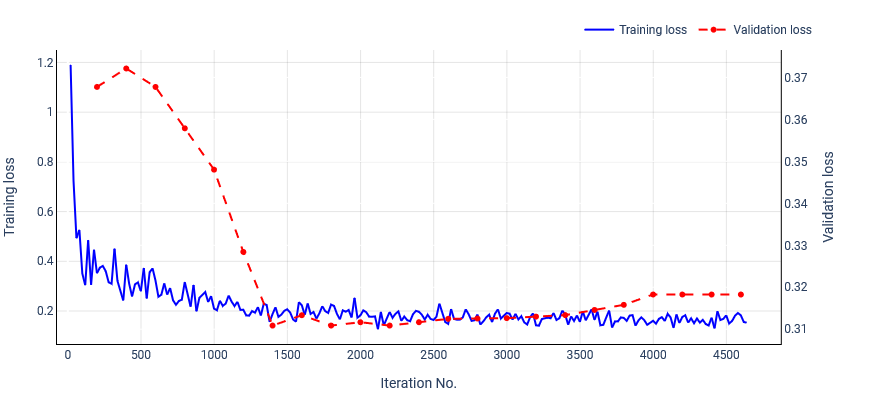

In [79]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(
        x = df.iteration,
        y = df.total_loss,
        name='Training loss',
        line_color = 'blue'
))

_tmp_df = df[df.validation_loss.notnull()]

fig.add_trace(
    go.Scatter(
        x = _tmp_df.iteration,
        y = _tmp_df.validation_loss,
        mode='lines+markers',
        name='Validation loss',
        line_color = 'red',
        line_dash = 'dash'
        
), secondary_y=True)

fig.update_xaxes(showline=True, linecolor='black')
fig.update_yaxes(title_text="Training loss", secondary_y=False, showline=True, linecolor='black')
fig.update_yaxes(title_text="Validation loss", secondary_y=True, showline=True, linecolor='black')

fig.update_layout(
        xaxis_title="Iteration No.",
        width = WIDTH,
        height = HEIGHT,
        margin=MARGIN_DICT,
        font=FONT_DICT,
        **BG_GRID_COLOR_DICT,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=0.99
        )
)

fig.show()

In [84]:
file_to_write = os.path.join('image', 'trn_vs_val_loss.svg')
fig.write_image(file_to_write)